# Using tlemcee
The main purpose of tlemcee is to perform TLE-based fitting of orbital arcs. However, there a several components that may be useful to you for stand-alone tasks.

## 1. Pulling a TLE from Space-Track
The st.tle module contains routines for interacting with the Space-Track API. For a given NORAD ID, you can opt to pull the latest TLE, or one closest to a past epoch.

In [1]:
from st.tle import ST

st = ST()

# let's take Globalstar M051 as an example
norad_id = 25853
tle = st.get_latest_tle(norad_id)
print('{}\n'
      '{}\n'
      '{}'.format(tle.name,
                  tle.line1,
                  tle.line2))

Space-Track password: ········
GLOBALSTAR M051
1 25853U 99037C   20155.68520036 -.00000050 +00000-0 +55214-3 0  9990
2 25853 051.9759 158.3171 0001338 238.8995 121.1684 11.42173448922186


In [2]:
# for the rest of this tutorial, we'll be using archival data, so let's pull the past TLE
from datetime import datetime
epoch_isoformat = '2019-08-05T00:00:00.00'
epoch = datetime.strptime(epoch_isoformat, '%Y-%m-%dT%H:%M:%S.%f')

tle = st.get_past_tle(norad_id, epoch)
print('{}\n'
      '{}\n'
      '{}'.format(tle.name,
                  tle.line1,
                  tle.line2))

GLOBALSTAR M051
1 25853U 99037C   19217.38976566 -.00000083  00000-0 -26660-3 0  9997
2 25853  51.9779 169.9388 0001906  37.6584  92.9962 11.42175762887552


You can also pull SatCat information for the NORAD object:

In [3]:
st.get_sat_cat(norad_id)

INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,APOGEE,PERIGEE,COMMENT,COMMENTCODE,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
str9,str5,str7,str15,str4,str10,str5,object,str6,str5,str4,str4,object,object,str1,str5,str4,str4,str2,str1,str1,str15,str9,str5
1999-037C,25853,PAYLOAD,GLOBALSTAR M051,GLOB,1999-07-10,AFETR,None,126.08,51.98,1952,1950,None,None,0,LARGE,7328,1999,37,C,Y,GLOBALSTAR M051,1999-037C,25853


## 2. TLE modification
The calls above return an st.tle.TLE object, a useful container for tasks that you may wish to carry out using the TLE. If you already have the TLE information to hand, it's easy to set this yourself:

In [4]:
# TLE information - use past TLE as above
tle_name = 'GLOBALSTAR M051'
tle_line1 = '1 25853U 99037C   19217.38976566 -.00000083  00000-0 -26660-3 0  9997'
tle_line2 = '2 25853  51.9779 169.9388 0001906  37.6584  92.9962 11.42175762887552'

from st.tle import TLE
tle = TLE(tle_line1, tle_line2, name=tle_name)
print('{}\n'
      '{}\n'
      '{}'.format(tle.name,
                  tle.line1,
                  tle.line2))

GLOBALSTAR M051
1 25853U 99037C   19217.38976566 -.00000083  00000-0 -26660-3 0  9997
2 25853  51.9779 169.9388 0001906  37.6584  92.9962 11.42175762887552


You can access individual elements like so:

In [5]:
print('NORAD ID: {}\n'
      'Intl designator: {} {} {}\n'
      'Reference epoch: {}\n'
      'First derivative of mean motion: {}\n'
      'Second derivative of mean motion: {}\n'
      'Drag coefficient: {}\n'
      'Set number: {}\n'
      'Inclination: {}\n'
      'RAAN: {}\n'
      'Eccentricity: {}\n'
      'Argument of perigee: {}\n'
      'Mean anomaly: {}\n'
      'Mean motion: {}\n'
      'Revolution number: {}'.format(tle.norad_id.value,
                                     tle.designator.year,
                                     tle.designator.number,
                                     tle.designator.id,
                                     tle.epoch.date.isoformat(),
                                     tle.mmdot.value,
                                     tle.mmdot2.value,
                                     tle.drag.value,
                                     tle.setnumber.value,
                                     tle.inclination.value.deg,
                                     tle.raan.value.deg,
                                     tle.eccentricity.value,
                                     tle.argperigee.value.deg,
                                     tle.meananomaly.value.deg,
                                     tle.mm.value,
                                     tle.revnumber.value))

NORAD ID: 25853
Intl designator: 1999 37 C
Reference epoch: 2019-08-05T09:21:15.753024
First derivative of mean motion: -8.3e-07
Second derivative of mean motion: 0.0
Drag coefficient: 0.0002666
Set number: 999
Inclination: 51.9779
RAAN: 169.9388
Eccentricity: 0.0001906
Argument of perigee: 37.65840000000003
Mean anomaly: 92.99619999999999
Mean motion: 11.42175762
Revolution number: 88755


Each attribute of the st.tle.TLE object stems from a container within st.tlelements. These are useful if you ever need to treat an element individually. 

Full documentation is provided within the st.tlelements module itself regarding suitable inputs, and so on. All containers accept the relevant TLE line as input (69 characters), alongside value inputs (e.g. float or str).

Most of the containers have value and entry attributes (see example 1 below). Others have more intuitive attributes (see example 2 below). For angular elements, the value attribute is an astropy.coordinates.Angle object, so a unit can be specified (see above).

In [6]:
## example 1
from st.tlelements import Eccentricity

# value input
eccentricity_value = 0.0001906
eccentricity = Eccentricity(eccentricity_value)

# TLE line input - remember eccentricity is associated with line 2
eccentricity = Eccentricity(tle_line2)

print('{}\n'
      'Value: {}\n'
      'Entry: {}'.format(eccentricity,
                         eccentricity.value,
                         eccentricity.entry))

Eccentricity <0001906>
Value: 0.0001906
Entry: 0001906


In [7]:
## example 2
from st.tlelements import Epoch

# datetime input
epoch_dt = datetime.strptime('2019-08-05T09:21:15.753024', '%Y-%m-%dT%H:%M:%S.%f')  # from TLE above
epoch = Epoch(epoch_dt)

# TLE line input - remember reference epoch is associated with line 1
epoch = Epoch(tle_line1)

print('{}\n'
      'Year: {}\n'
      'Fractional yearday: {}\n'
      'Entry: {}\n'
      'Date: {}\n'
      'Isoformat: {}'.format(epoch,
                             epoch.year,
                             epoch.yearday,
                             epoch.entry,
                             epoch.date,
                             epoch.date.isoformat()))

Reference epoch <19217.38976566>
Year: 2019
Fractional yearday: 217.38976566
Entry: 19217.38976566
Date: 2019-08-05 09:21:15.753024
Isoformat: 2019-08-05T09:21:15.753024


For some tasks, like optimizing a TLE, it may be necessary to modify elements. The st.tle.TLE object has a method for this:

In [8]:
# modify the inclination
old_inclination = tle.inclination.value.deg
print('Before modification\n'
      '-------------------\n'
      'Inclination: {}\n'
      'Line 2: {}'.format(tle.inclination.value.deg,
                          tle.line2))

new_inclination = 0.002  # degrees
tle.modify_elements(inclination=new_inclination)
print('\n'
      'After modification\n'
      '------------------\n'
      'Inclination: {}\n'
      'Line 2: {}'.format(tle.inclination.value.deg,
                          tle.line2))

# change back for remaining examples
tle.modify_elements(inclination=old_inclination)

Before modification
-------------------
Inclination: 51.9779
Line 2: 2 25853  51.9779 169.9388 0001906  37.6584  92.9962 11.42175762887552

After modification
------------------
Inclination: 0.002
Line 2: 2 25853   0.0020 169.9388 0001906  37.6584  92.9962 11.42175762887552


## 3. Loading orbital arc and site information
The orbit fitting routines available within tlemcee require the orbital arc information to be configured in a certain way. 

To help with this, it is best to feed the information into an arc.Arc object, which performs the necessary formatting tests and provides guidance for fixing issues. The arc.Arc object takes as input an astropy Table with the following columns:
1. "UTC" - Observation timestamps in UTC isoformat
2. "RA" - Measured right ascensions
3. "DEC" - Measured declinations
4. "RAERR" - Uncertainties in measured right ascensions
5. "DECERR" - Uncertainties in measured declination

The observation site can be set using the st.site.Site container; you can view existing sites and add new ones in the st.site module.

In [9]:
# load ephemeris information from file
from astropy.table import Table
ephem_path = './tutorial/ephem_globalstar_m051_20190807-08.csv'
ephem_table = Table.read(ephem_path, format='csv')

# set site information
from st.site import Site
site = Site('RASA')  # add new sites in the st.site module

# feed into arc.Arc container
from arc import Arc
arc = Arc(site, ephem_table)

# table is accessible via attribute
arc.ephem

UTC,RA,DEC,RAERR,DECERR
str23,float64,float64,float64,float64
2019-08-07T01:11:59.512,234.0457816,56.86609662,0.007114720681240196,0.003888889
2019-08-07T01:12:56.939,244.1068873,58.36490674,0.0074143632184880725,0.003888889
2019-08-07T01:13:54.361,256.2408856,59.08396839,0.007569152149820221,0.003888889
2019-08-07T01:14:51.812,270.1848175,58.54320438,0.007452042150549774,0.003888889
2019-08-07T01:15:49.212,284.8175958,56.2684607,0.007003192616393716,0.003888889
2019-08-07T01:16:46.174,298.7177658,52.01615483,0.006318883448935199,0.003888889
2019-08-08T00:17:58.530,243.64806,72.8558856,0.013192315917679137,0.00388878
2019-08-08T00:18:56.299,268.505482,73.7987752,0.013937698384129909,0.00388878
2019-08-08T00:19:53.306,294.146608,71.6518828,0.01235358175902646,0.00388878


## 4. Simulating orbital arcs
In some cases you may wish to simulate the orbital arc mapped out by a TLE over a period of time; this can be useful, for example, when planning your observational strategy for tracking a given target. 

This can also be done with an arc.Arc object:

Space-Track password: ········


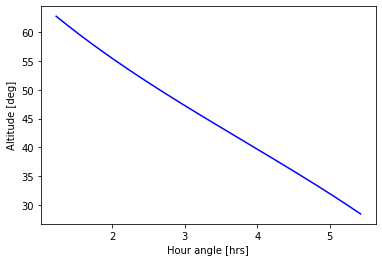

In [10]:
# initialise Arc with no ephemeris table
arc_sim = Arc(site)

# let's simulate the orbital arc mapped by globalstar M051 for the first night of data above
start_time = datetime.strptime(arc.ephem['UTC'][0], '%Y-%m-%dT%H:%M:%S.%f')
end_time = datetime.strptime(arc.ephem['UTC'][5], '%Y-%m-%dT%H:%M:%S.%f')

# set cadence
from datetime import timedelta
step = timedelta(seconds=2.)

# simulate ephemeris table
arc_sim.simulate_ephem(norad_id, start_time, end_time, step)

# plot simulated arc
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(arc_sim.ephem['HA'], arc_sim.ephem['ALT'], 'b-')
plt.xlabel('Hour angle [hrs]')
plt.ylabel('Altitude [deg]')
plt.show()

## 5. Propagating a TLE
One of the most common tasks involving a TLE is propagating the orbital solution to predict where the object will appear in the sky at a given time. This can be done easily using methods of the st.tle.TLE object:

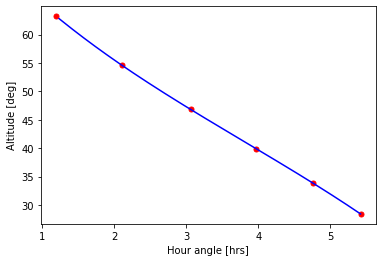

In [11]:
# parse time and site information to the TLE object
times = []
for time in arc.ephem['UTC']:
    times.append(datetime.strptime(time, '%Y-%m-%dT%H:%M:%S.%f'))

tle.parse_propagation_info(times, site)

# predict right ascension/ declination, hour angle, altitude/ azimuth as follows
ra_tle, dec_tle = tle.propagate_radec()
ha_tle = tle.propagate_ha()
alt_tle, az_tle = tle.propagate_altaz()

# let's check that the first night aligns with the simulated arc above
plt.plot(ha_tle[:6], alt_tle[:6], 'r.', markersize=10)
plt.plot(arc_sim.ephem['HA'], arc_sim.ephem['ALT'], 'b-')
plt.xlabel('Hour angle [hrs]')
plt.ylabel('Altitude [deg]')
plt.show()

Good! The arc.Arc simulator uses the same propagation routines as the st.tle.TLE object, so this overlap is a successful sanity check.

## 6. Initial orbit determination
With the orbital arc loaded, we can perform an initial orbit determination. A Python implementation of the Gauss method of preliminary orbit determination is provided as part of tlemcee. 

The Gauss method takes as input three observations. The quality of the solution will vary significantly depending on the time interval between the first and third observation. From experience, the following should serve as a guide:
1. For a typical LEO pass (5-10 minutes), use three observations that span the entire pass.
2. Geostationary candidates typically favour short time intervals, though avoid intervals below 5 minutes (solutions unstable due to geometry of problem); stick to 6-10 minutes.
3. Geosynchronous candidates can vary, a range of 6-20 minutes is advisable. Beyond 30 minutes the solution degrades owing to algorithmic assumptions.

Note that in cases where the orbit is circular, equatorial or both (as in the case of geostationary satellites), estimates of RAAN, argument of perigee and mean anomaly can be very poor, requiring subsequent fitting of the orbit (see later on in the tutorial).

The algorithm can be carried out as follows:

TLE / IOD
--
i = 51.9779 / 52.089694177209026 deg
e = 0.0001906 / 0.001874997857396887
mm = 11.42175762 / 11.428994716439114 revs/day
raan = 169.9388 / 163.3526535464723 deg
argp = 37.65840000000003 / 41.52843714814084 deg
anom = 92.99619999999999 / 86.36401533623736 deg

Reference epoch: 2019-08-08T00:20:51.466000
1     0U          19220.01448456 +.00000000 +00000+0 +00000+0 0    02
2     0  52.0897 163.3527 0018750  41.5284  86.3640 11.42899472    02


Text(0.5, 1.0, '20190808')

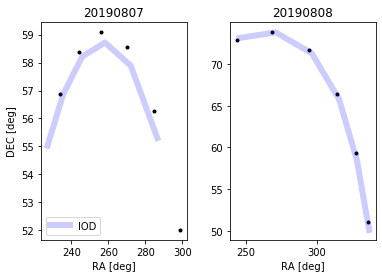

In [12]:
# let's use the second night of observations from above for Globalstar M051
# we take a trio of observations that span the majority of the pass
# note: where possible, average over many trios with suitable time intervals (not for LEO)
n1 = 7
n2 = 9
n3 = 11
orbit = arc.initialOrbit(n1,
                         n2,
                         n3,
                         improve=True)  # carry out iterative improvement of solution

# note: multiple solutions are possible
print('TLE / IOD\n'
      '--\n'
      'i = {} / {} deg\n'
      'e = {} / {}\n'
      'mm = {} / {} revs/day\n'
      'raan = {} / {} deg\n'
      'argp = {} / {} deg\n'
      'anom = {} / {} deg\n'.format(tle.inclination.value.deg,
                                    orbit[0]['i'],
                                    tle.eccentricity.value,
                                    orbit[0]['e'],
                                    tle.mm.value,
                                    24. / orbit[0]['T'],
                                    tle.raan.value.deg,
                                    orbit[0]['Omega'],
                                    tle.argperigee.value.deg,
                                    orbit[0]['omega'],
                                    tle.meananomaly.value.deg,
                                    orbit[0]['theta']))

# IOD finds state vector for second observation, so reference TLE to this
epoch_iod = datetime.strptime(arc.ephem['UTC'][n2], '%Y-%m-%dT%H:%M:%S.%f')
print('Reference epoch: {}'.format(epoch_iod.isoformat()))

# feed IOD to TLE
tle_iod = TLE()  # initialising TLE without lines will set defaults (zero for most elements)
tle_iod.modify_elements(epoch=epoch_iod,
                        inclination=orbit[0]['i'],
                        eccentricity=orbit[0]['e'],
                        mm=24. / orbit[0]['T'],
                        raan=orbit[0]['Omega'],
                        argperigee=orbit[0]['omega'],
                        meananomaly=orbit[0]['theta'])
print(tle_iod.line1)
print(tle_iod.line2)

# let's propagate the IOD TLE and see how close it gets
tle_iod.parse_propagation_info(times, Site('RASA'))
ra_iod, dec_iod = tle_iod.propagate_radec()

fig = plt.figure()
grid = plt.GridSpec(1, 2, wspace=0.3)
ax0 = fig.add_subplot(grid[0,0])
ax1 = fig.add_subplot(grid[0,1])

ax0.plot(arc.ephem['RA'][:6], arc.ephem['DEC'][:6], 'k.')
ax0.plot(ra_iod[:6], dec_iod[:6], 'b-', lw=6, alpha=0.2, label='IOD')
ax0.set_xlabel('RA [deg]')
ax0.set_ylabel('DEC [deg]')
ax0.set_title('20190807')
ax0.legend(loc=3)

ax1.plot(arc.ephem['RA'][6:], arc.ephem['DEC'][6:], 'k.')
ax1.plot(ra_iod[6:], dec_iod[6:], 'b-', lw=6, alpha=0.2)
ax1.set_xlabel('RA [deg]')
ax1.set_title('20190808')

We find that the IOD solution is fairly poor, although a decent first estimate...

## 7. Orbit refinement
To refine this initial estimate, we can use the TLE-based MCMC fitter in tlemcee. First we need to set up a config file with priors and book-keeping information: 

In [13]:
# TODO: write a dedicated function for config generation
config = {
    "fixed": {
        "epoch": {
            "value": epoch_iod.isoformat()  # IOD reference epoch
        }, 
        "drag": {
            "value": tle.drag.value  # TODO: generalise drag init, fixed to TLE value for now
        }
    }, 
     "uniform": {
         "mmdot": {
             "init": 0.0,  # TODO: generalise mmdot init, generous exploration for now
             "llim": -2e-06,
             "ulim": 2e-06, 
             "wght": 1e-08
         }, 
         "inclination": {
             "init": orbit[0]['i'],  # IOD value, physical limits
             "llim": 0.0, 
             "ulim": 180.0, 
             "wght": 1.8
         }, 
         "raan": {
             "init": orbit[0]['Omega'],  # IOD input, physical limits
             "llim": 0.0, 
             "ulim": 360.0, 
             "wght": 3.0
         }, 
         "eccentricity": {
             "init": orbit[0]['e'],  # IOD input, limits for LEO
             "llim": 0.0, 
             "ulim": 0.25, 
             "wght": 0.01
         }, 
         "argperigee": {
             "init": orbit[0]['omega'],  # IOD input, physical limits
             "llim": 0.0, 
             "ulim": 360.0, 
             "wght": 3.0}, 
         "meananomaly": {
             "init": orbit[0]['theta'],  # IOD input, physical limits
             "llim": 0.0, 
             "ulim": 360.0, 
             "wght": 3.0
         }, 
         "mm": {
             "init": 24. / orbit[0]['T'],  # IOD input, reasonable limits for this case
             "llim": 8.0, 
             "ulim": 15.0, 
             "wght": 0.1
         }
     }, 
     "n_steps": 1000, 
     "walker_scaling": 1,
     "out_dir": "./tutorial/",
     "ephem_path": "./tutorial/ephem_globalstar_m051_20190807-08.csv", 
     "site_name": "RASA"
}

# save config to file
import json
config_path = './tutorial/config.json'
with open(config_path, 'w') as cf:
    json.dump(config, cf)

In [14]:
from mcmc.config import Config
from mcmc.sampler import Sampler

config = Config(config_path)

sampler = Sampler(config)
sampler.run(verbose=True, save=True)

MCMC completed in 40.16280722618103 seconds


The sampler.Sampler object contains the chain information for our MCMC. There are useful methods available for diagnostic plotting:
1. sampler.plot_time_series(save=True) will plot the time series for the variable parameters and save to file.
2. sampler.plot_corner(burnin, save=True) will plot a corner diagram, which gives the 1D and 2D projections of the posterior probability distribution, showing the covariances between the paramaters. An optional burn-in can be applied, to sample solely from the user-assessed 'flattened' region, if the time series show convergence on a particular solution.

Extraction of the 'best' model can also be carried out via a method of the sampler.Sampler object. If a burn-in is provided, a median of the flattened region of the chain for each parameter is taken. This method 

In [15]:
# plot parameter time series
tle_mcmc = sampler.get_best_model(save=True)
print('Best model:\n'
      '--\n'
      '{}\n'
      '{}'.format(tle_mcmc.line1,
                  tle_mcmc.line2))

Best model:
--
1     0U          19220.01448456 +.00000104 +00000+0 +26660-3 0    02
2     0  51.9771 163.6037 0000750  72.3425  55.3345 11.42175504    02


Now we have a model TLE, let's see how well it performs. Recall that we've used two nights of observations to fit the orbit (see IOD above). Let's see how well the model TLE propagates to timestamps of additional measurements that were taken a night either side of the two nights used...

In [33]:
## fitted nights
# propagate model TLE
tle_mcmc.parse_propagation_info(times, Site('RASA'))
ra_mcmc, dec_mcmc = tle_mcmc.propagate_radec()

new_night = 6 # index for start of second night

# time since start on x axes
times_07 = []
times_08 = []
for time in times[:new_night]:
    times_07.append((time - times[:new_night][0]).seconds / 60)
for time in times[new_night:]:
    times_08.append((time - times[new_night:][0]).seconds / 60)

# astropy coords for separation calculations
from astropy.coordinates import SkyCoord
from astropy import units as u

data_coords = SkyCoord(arc.ephem['RA'], arc.ephem['DEC'], unit=u.deg, frame='icrs')
tle_coords = SkyCoord(ra_tle, dec_tle, unit=u.deg, frame='icrs')
mcmc_coords = SkyCoord(ra_mcmc, dec_mcmc, unit=u.deg, frame='icrs')

tle_sep = data_coords.separation(tle_coords).value
mcmc_sep = data_coords.separation(mcmc_coords).value

## propagated nights
# load orbital arc for nights to be propagated
ephem_path = './tutorial/ephem_globalstar_m051_20190806+09.csv'
ephem_table = Table.read(ephem_path, format='csv')

arc_prop = Arc(site, ephem_table)

times_prop = []
for time in arc_prop.ephem['UTC']:
    times_prop.append(datetime.strptime(time, '%Y-%m-%dT%H:%M:%S.%f'))

# propagate TLE
tle.parse_propagation_info(times_prop, Site('RASA'))
ra_tle_prop, dec_tle_prop = tle.propagate_radec()

# propagate model TLE
tle_mcmc.parse_propagation_info(times_prop, Site('RASA'))
ra_mcmc_prop, dec_mcmc_prop = tle_mcmc.propagate_radec()

new_night_prop = 5 # index for start of second night

# time since start on x axes
times_06 = []
times_09 = []
for time in times_prop[:new_night_prop]:
    times_06.append((time - times_prop[:new_night_prop][0]).seconds / 60)
for time in times_prop[new_night_prop:]:
    times_09.append((time - times_prop[new_night_prop:][0]).seconds / 60)

# astropy coordinates for separation calculations
data_coords_prop = SkyCoord(arc_prop.ephem['RA'], arc_prop.ephem['DEC'], unit=u.deg, frame='icrs')
tle_coords_prop = SkyCoord(ra_tle_prop, dec_tle_prop, unit=u.deg, frame='icrs')
mcmc_coords_prop = SkyCoord(ra_mcmc_prop, dec_mcmc_prop, unit=u.deg, frame='icrs')

tle_sep_prop = data_coords_prop.separation(tle_coords_prop).value
mcmc_sep_prop = data_coords_prop.separation(mcmc_coords_prop).value

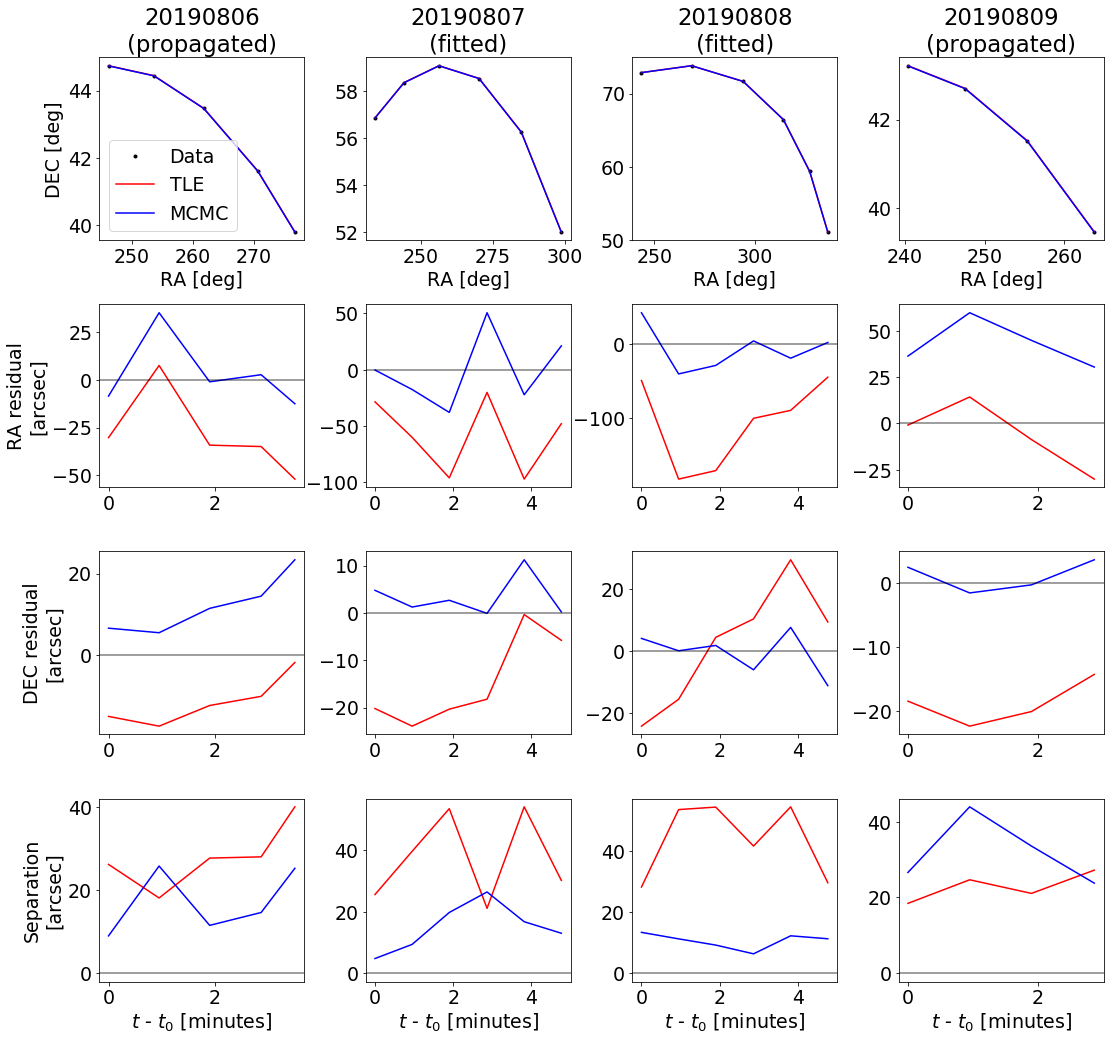

In [52]:
# construct figure
plt.rcParams.update({'font.size': 19})
fig = plt.figure(figsize=(18,17))
grid = plt.GridSpec(4, 4, wspace=0.3, hspace=0.35)

# fitted nights
ax01 = fig.add_subplot(grid[0,1])
ax11 = fig.add_subplot(grid[1,1])
ax21 = fig.add_subplot(grid[2,1])
ax31 = fig.add_subplot(grid[3,1])
ax02 = fig.add_subplot(grid[0,2])
ax12 = fig.add_subplot(grid[1,2])
ax22 = fig.add_subplot(grid[2,2])
ax32 = fig.add_subplot(grid[3,2])

ax01.plot(arc.ephem['RA'][:new_night], arc.ephem['DEC'][:new_night], 'k.', ms=6, label='Data')
ax01.plot(ra_tle[:new_night], dec_tle[:new_night], 'r-', label='TLE')
ax01.plot(ra_mcmc[:new_night], dec_mcmc[:new_night], 'b-', label='MCMC')
ax01.set_xlabel('RA [deg]')
ax01.set_title('20190807\n(fitted)')

ax11.plot(times_07, (arc.ephem['RA'][:new_night] - ra_tle[:new_night])*3600, 'r-', label='TLE')
ax11.plot(times_07, (arc.ephem['RA'][:new_night] - ra_mcmc[:new_night])*3600, 'b-', label='MCMC')
ax11.axhline(y=0, color='k', alpha=0.5)

ax21.plot(times_07, (arc.ephem['DEC'][:new_night] - dec_tle[:new_night])*3600, 'r-', label='TLE')
ax21.plot(times_07, (arc.ephem['DEC'][:new_night] - dec_mcmc[:new_night])*3600, 'b-', label='MCMC')
ax21.axhline(y=0, color='k', alpha=0.5)

ax31.plot(times_07, tle_sep[:new_night]*3600, 'r-', label='TLE')
ax31.plot(times_07, mcmc_sep[:new_night]*3600, 'b-', label='MCMC')
ax31.set_xlabel('$t$ - $t_0$ [minutes]')
ax31.axhline(y=0, color='k', alpha=0.5)

ax02.plot(arc.ephem['RA'][new_night:], arc.ephem['DEC'][new_night:], 'k.', ms=6, label='Data')
ax02.plot(ra_tle[new_night:], dec_tle[new_night:], 'r-', label='TLE')
ax02.plot(ra_mcmc[new_night:], dec_mcmc[new_night:], 'b-', label='MCMC')
ax02.set_xlabel('RA [deg]')
ax02.set_title('20190808\n(fitted)')

ax12.plot(times_07, (arc.ephem['RA'][new_night:] - ra_tle[new_night:])*3600, 'r-', label='TLE')
ax12.plot(times_07, (arc.ephem['RA'][new_night:] - ra_mcmc[new_night:])*3600, 'b-', label='MCMC')
ax12.axhline(y=0, color='k', alpha=0.5)

ax22.plot(times_07, (arc.ephem['DEC'][new_night:] - dec_tle[new_night:])*3600, 'r-', label='TLE')
ax22.plot(times_07, (arc.ephem['DEC'][new_night:] - dec_mcmc[new_night:])*3600, 'b-', label='MCMC')
ax22.axhline(y=0, color='k', alpha=0.5)

ax32.plot(times_07, tle_sep[new_night:]*3600, 'r-', label='TLE')
ax32.plot(times_07, mcmc_sep[new_night:]*3600, 'b-', label='MCMC')
ax32.set_xlabel('$t$ - $t_0$ [minutes]')
ax32.axhline(y=0, color='k', alpha=0.5)

# propagated nights
ax00 = fig.add_subplot(grid[0,0])
ax10 = fig.add_subplot(grid[1,0])
ax20 = fig.add_subplot(grid[2,0])
ax30 = fig.add_subplot(grid[3,0])
ax03 = fig.add_subplot(grid[0,3])
ax13 = fig.add_subplot(grid[1,3])
ax23 = fig.add_subplot(grid[2,3])
ax33 = fig.add_subplot(grid[3,3])

ax00.plot(arc_prop.ephem['RA'][:new_night_prop], arc_prop.ephem['DEC'][:new_night_prop], 'k.', ms=6, label='Data')
ax00.plot(ra_tle_prop[:new_night_prop], dec_tle_prop[:new_night_prop], 'r-', label='TLE')
ax00.plot(ra_mcmc_prop[:new_night_prop], dec_mcmc_prop[:new_night_prop], 'b-', label='MCMC')
ax00.set_xlabel('RA [deg]')
ax00.set_ylabel('DEC [deg]')
ax00.set_title('20190806\n(propagated)')
ax00.legend()

ax10.plot(times_06, (arc_prop.ephem['RA'][:new_night_prop] - ra_tle_prop[:new_night_prop])*3600, 'r-', label='TLE')
ax10.plot(times_06, (arc_prop.ephem['RA'][:new_night_prop] - ra_mcmc_prop[:new_night_prop])*3600, 'b-', label='MCMC')
ax10.axhline(y=0, color='k', alpha=0.5)
ax10.set_ylabel('RA residual\n[arcsec]')

ax20.plot(times_06, (arc_prop.ephem['DEC'][:new_night_prop] - dec_tle_prop[:new_night_prop])*3600, 'r-', label='TLE')
ax20.plot(times_06, (arc_prop.ephem['DEC'][:new_night_prop] - dec_mcmc_prop[:new_night_prop])*3600, 'b-', label='MCMC')
ax20.axhline(y=0, color='k', alpha=0.5)
ax20.set_ylabel('DEC residual\n[arcsec]')

ax30.plot(times_06, tle_sep_prop[:new_night_prop]*3600, 'r-', label='TLE')
ax30.plot(times_06, mcmc_sep_prop[:new_night_prop]*3600, 'b-', label='MCMC')
ax30.set_xlabel('$t$ - $t_0$ [minutes]')
ax30.set_ylabel('Separation\n[arcsec]')
ax30.axhline(y=0, color='k', alpha=0.5)

ax03.plot(arc_prop.ephem['RA'][new_night_prop:], arc_prop.ephem['DEC'][new_night_prop:], 'k.', ms=6, label='Data')
ax03.plot(ra_tle_prop[new_night_prop:], dec_tle_prop[new_night_prop:], 'r-', label='TLE')
ax03.plot(ra_mcmc_prop[new_night_prop:], dec_mcmc_prop[new_night_prop:], 'b-', label='MCMC')
ax03.set_xlabel('RA [deg]')
ax03.set_title('20190809\n(propagated)')

ax13.plot(times_09, (arc_prop.ephem['RA'][new_night_prop:] - ra_tle_prop[new_night_prop:])*3600, 'r-', label='TLE')
ax13.plot(times_09, (arc_prop.ephem['RA'][new_night_prop:] - ra_mcmc_prop[new_night_prop:])*3600, 'b-', label='MCMC')
ax13.axhline(y=0, color='k', alpha=0.5)

ax23.plot(times_09, (arc_prop.ephem['DEC'][new_night_prop:] - dec_tle_prop[new_night_prop:])*3600, 'r-', label='TLE')
ax23.plot(times_09, (arc_prop.ephem['DEC'][new_night_prop:] - dec_mcmc_prop[new_night_prop:])*3600, 'b-', label='MCMC')
ax23.axhline(y=0, color='k', alpha=0.5)

ax33.plot(times_09, tle_sep_prop[new_night_prop:]*3600, 'r-', label='TLE')
ax33.plot(times_09, mcmc_sep_prop[new_night_prop:]*3600, 'b-', label='MCMC')
ax33.set_xlabel('$t$ - $t_0$ [minutes]')
ax33.axhline(y=0, color='k', alpha=0.5)

plt.show()

We see that the MCMC fit performs better than the Space-Track TLE on the fitted nights (as is to be expected). Thereafter it performs similarly to the TLE when propagated to nights before/after those that were fitted.